In [22]:
from pathlib import Path

SAVE_DIR = Path("./MTBLS1572")

In [23]:
import numpy as np
import matplotlib.pyplot as plt

methods = ["SpecEmbedding", "MSBERT", "DreaMS", "Spec2Vec", "MS2DeepScore"]
hit_miss_indices = [
    [],
    [4, 18],
    [4, 17, 18],
    [4, 17],
    [4, 17, 18, 19]
]
output_indices = [
    [],
    [11, 12],
    [11, 19, 16],
    [11, 19],
    [11, 19, 7, 11]
]
matrix = []

for method, indices in zip(methods, hit_miss_indices):
    row = np.ones((21,))
    for index in indices:
        row[index] = 0
    matrix.append(row)

In [24]:
import numpy as np

query_spectra = np.load("/data1/xp/data/MSBert/MTBLS1572/query.npy", allow_pickle=True)

xlabels = [
    s.get("compound_name")
    for s in query_spectra
]

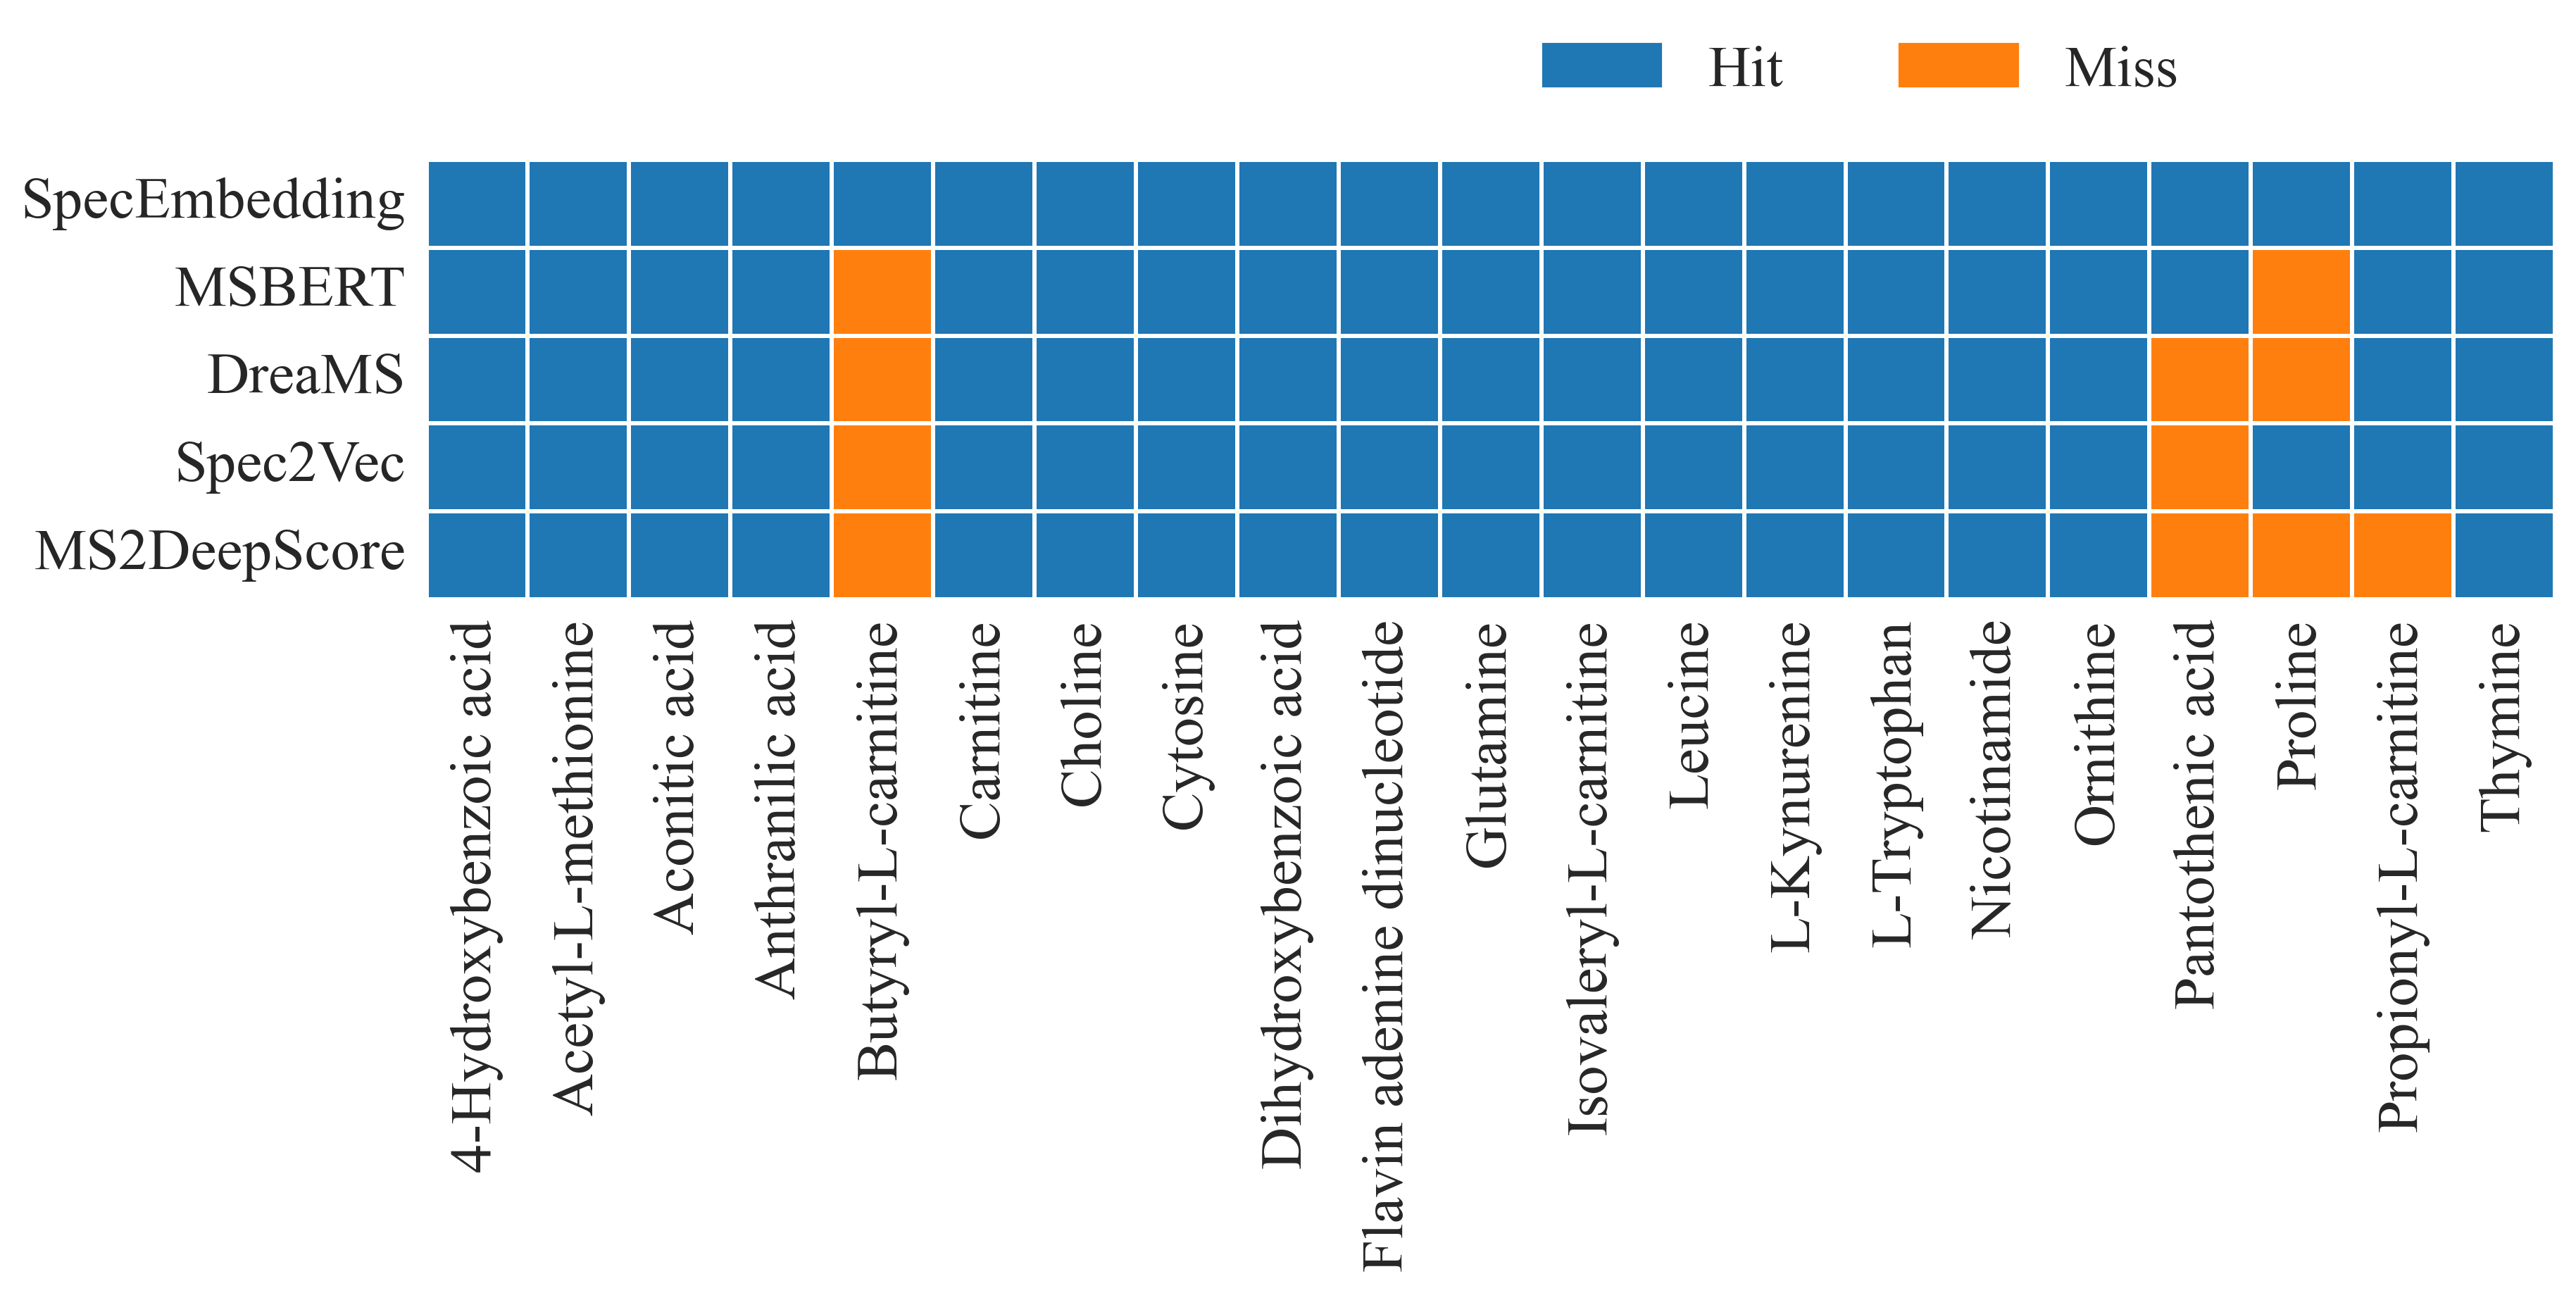

In [25]:
import seaborn as sns
import matplotlib.font_manager as fm
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.patches import Rectangle

sns.set_style("white")

fm.fontManager.addfont('/usr/share/fonts/truetype/msttcorefonts/times.ttf')
plt.rcParams['font.family'] = 'Times New Roman'

figure, ax = plt.subplots(1, 1, figsize=(13, 2.7), dpi=300)
colors = ["#ff7f0e", "#1f77b4"]
cmap = LinearSegmentedColormap.from_list('custom_cmap', colors, N=256)
sns.heatmap(matrix, ax=ax, linewidth=1.0, cmap=cmap, cbar=False, xticklabels=xlabels, yticklabels=methods)
ax.tick_params("x", labelsize=20)
ax.tick_params("y", labelsize=20)

labels = ["Hit", "Miss"]
handles = [Rectangle((0, 0), 1, 1, color=colors[1]), Rectangle((0, 0), 1, 1, color=colors[0])]
ax.legend(handles=handles, labels=labels, loc="lower left", bbox_to_anchor=(0.5, 1.02), frameon=False, ncol=2, fontsize=20)

In [26]:
figure.savefig(SAVE_DIR / "hit.svg", transparent=True, bbox_inches="tight")
figure.savefig(SAVE_DIR / "hit.pdf", transparent=True, bbox_inches="tight")
figure.savefig(SAVE_DIR / "hit.png", transparent=True, bbox_inches="tight")

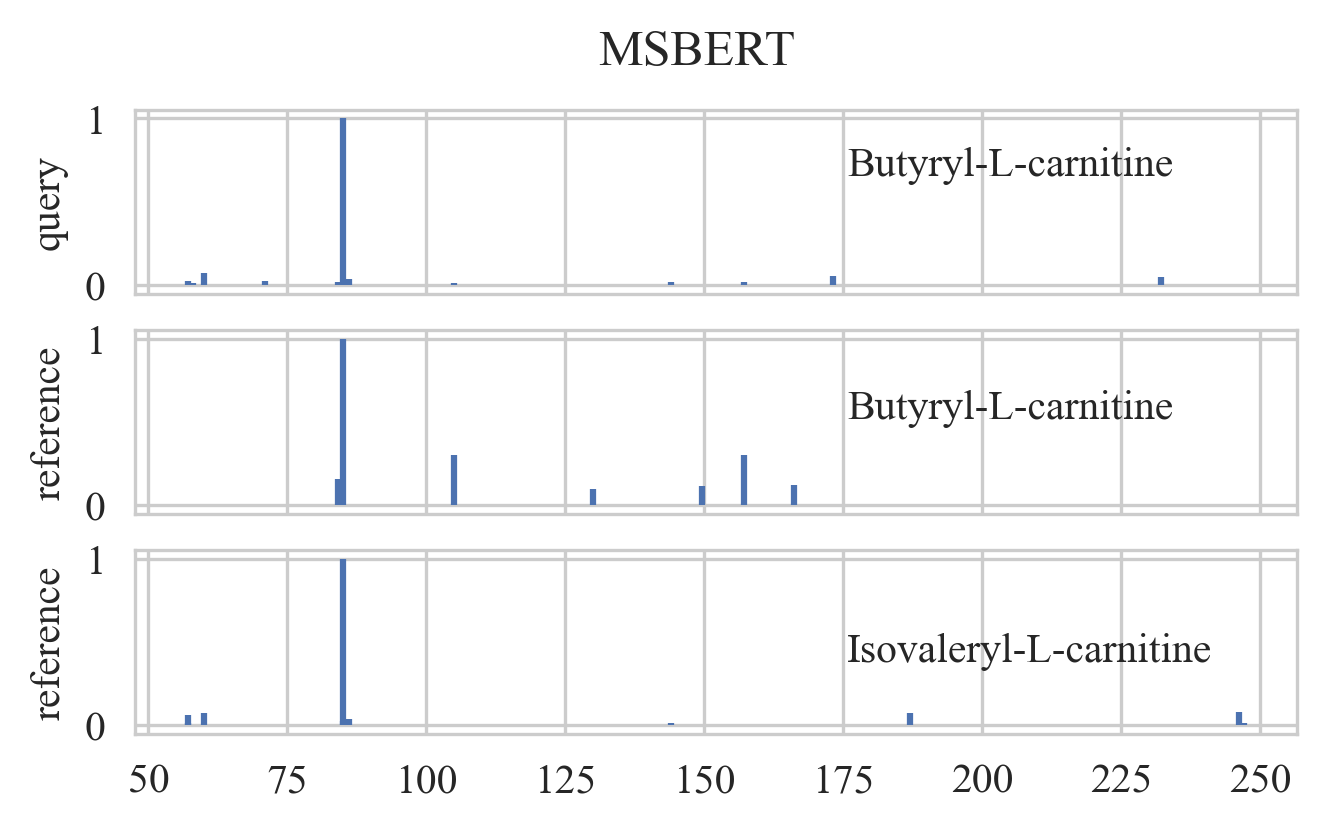

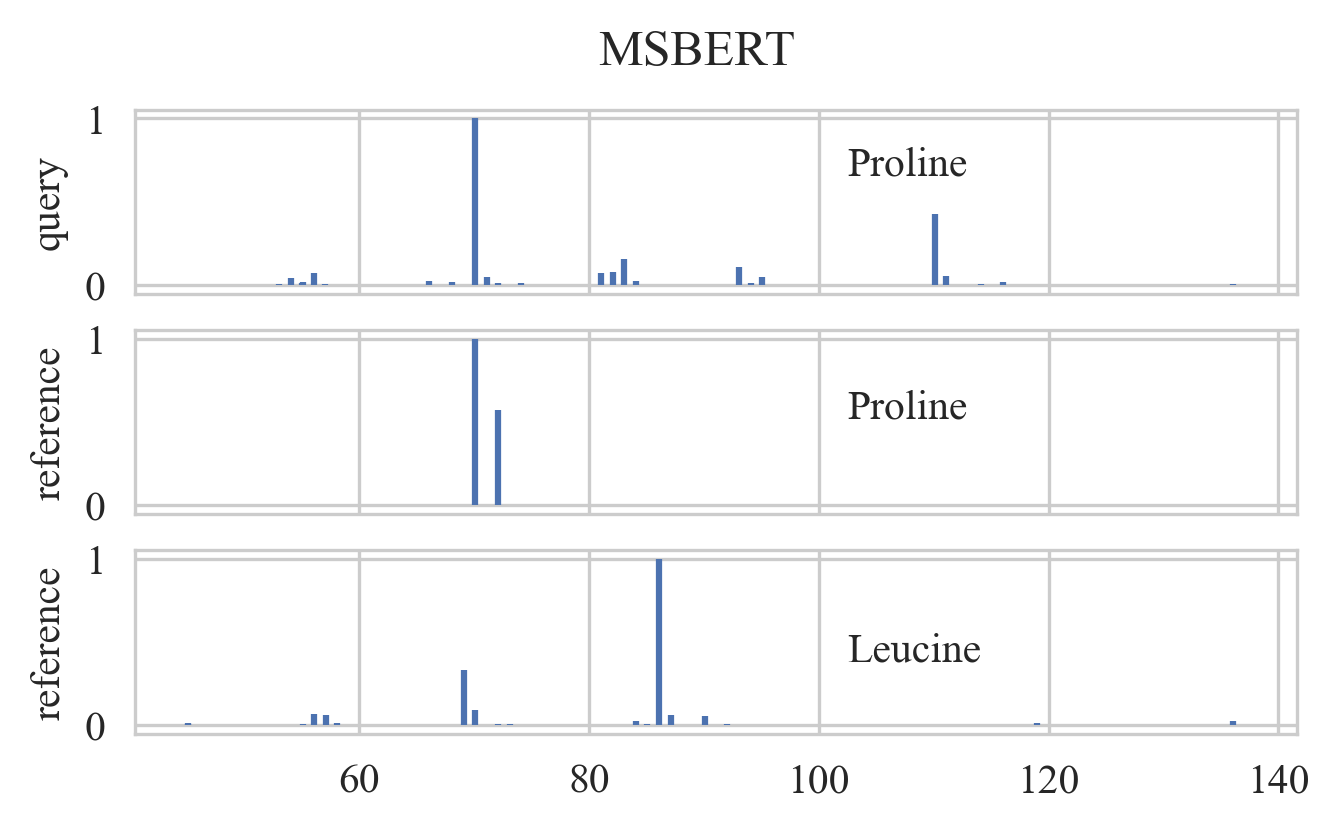

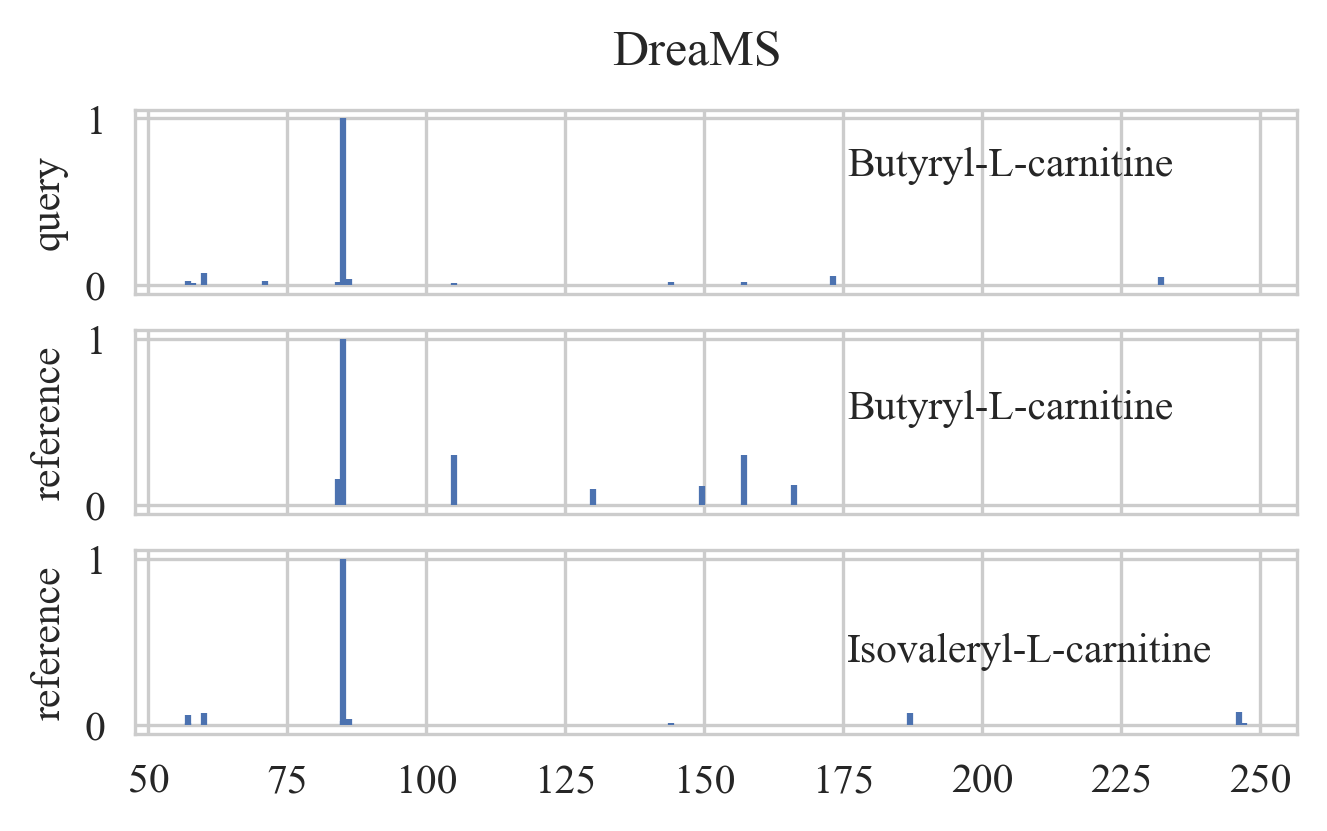

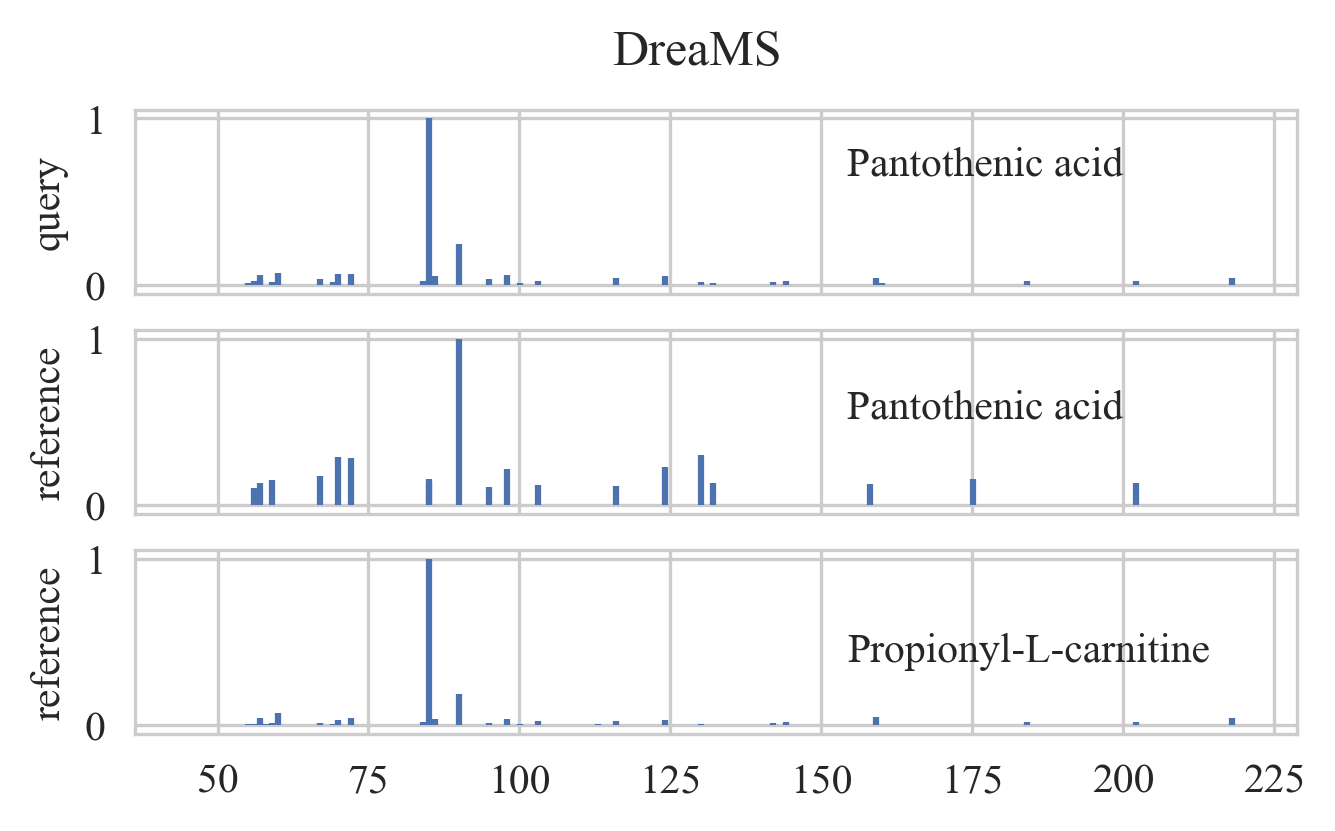

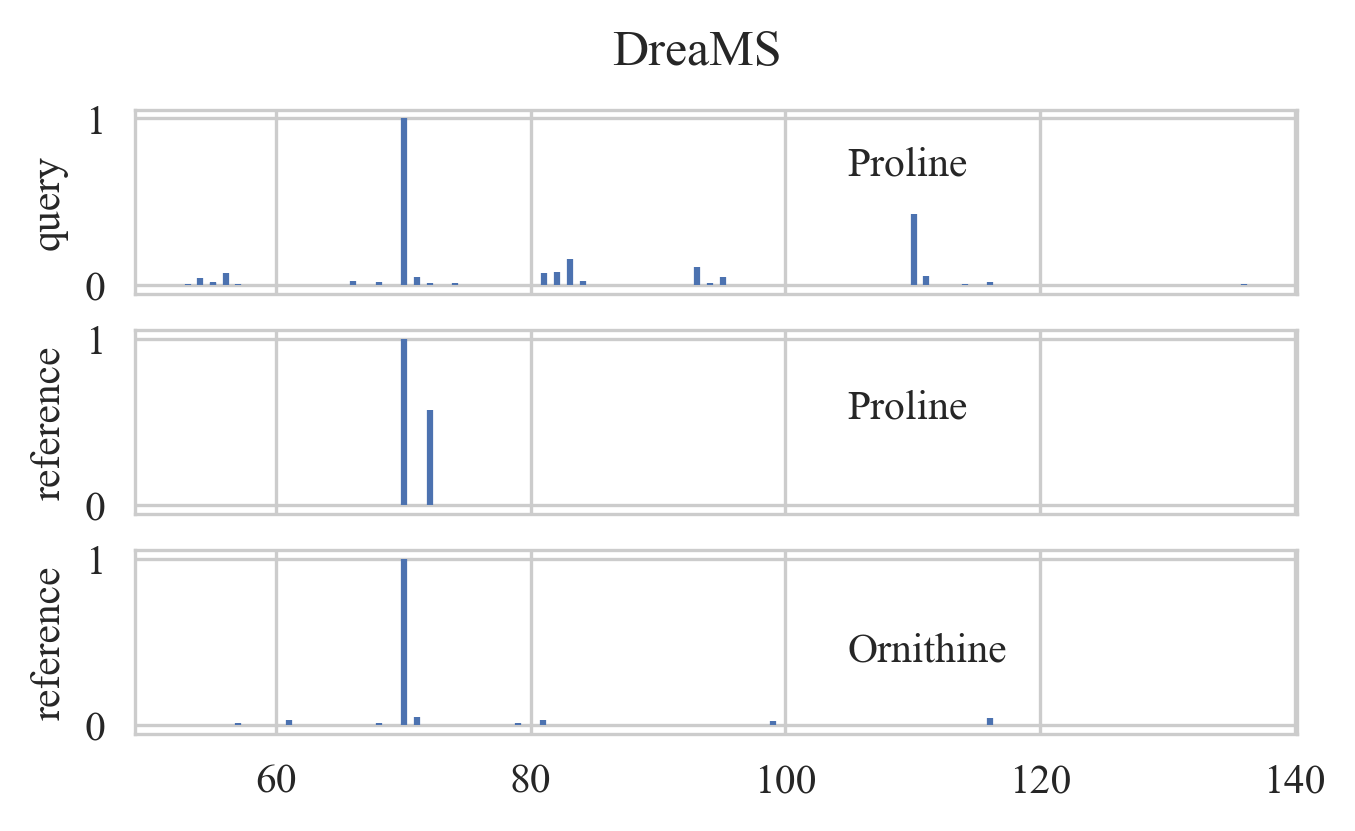

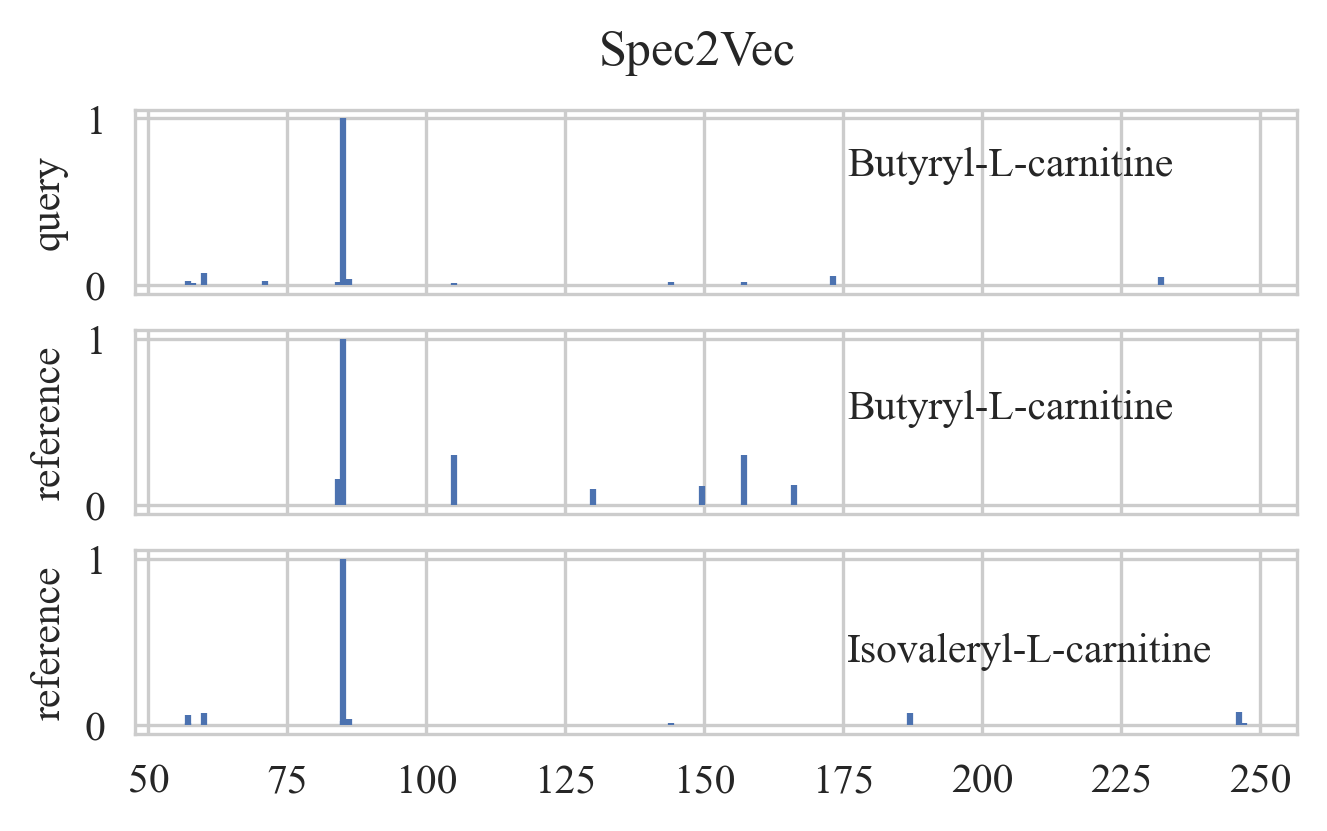

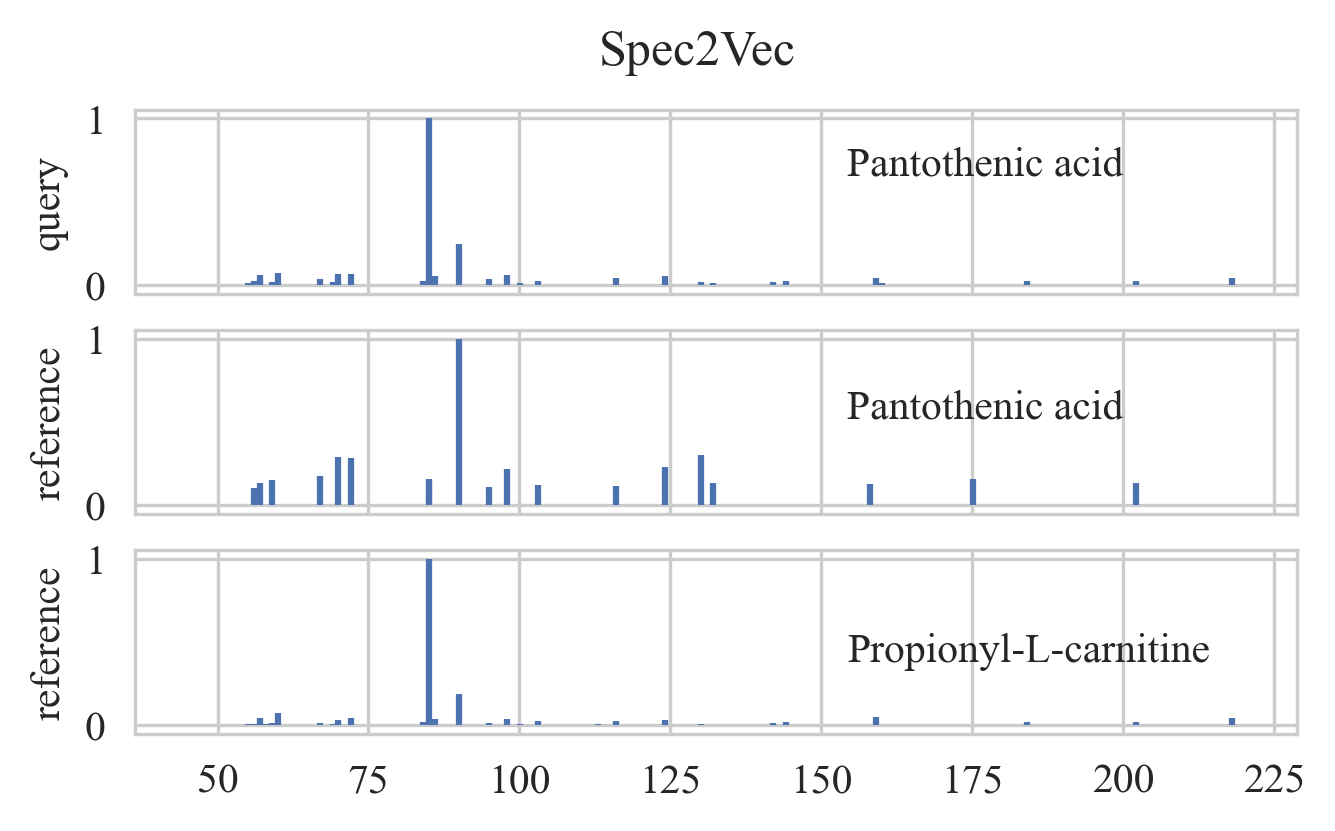

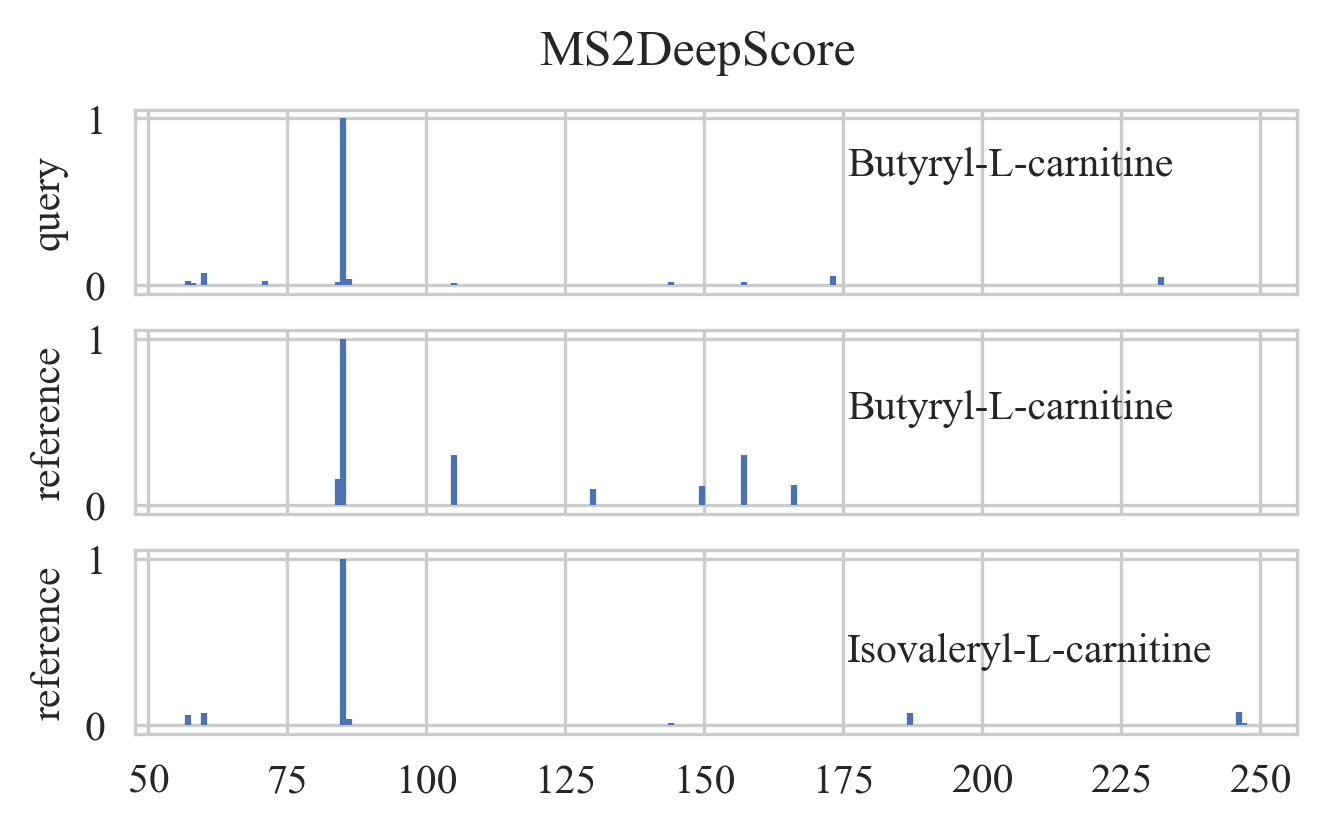

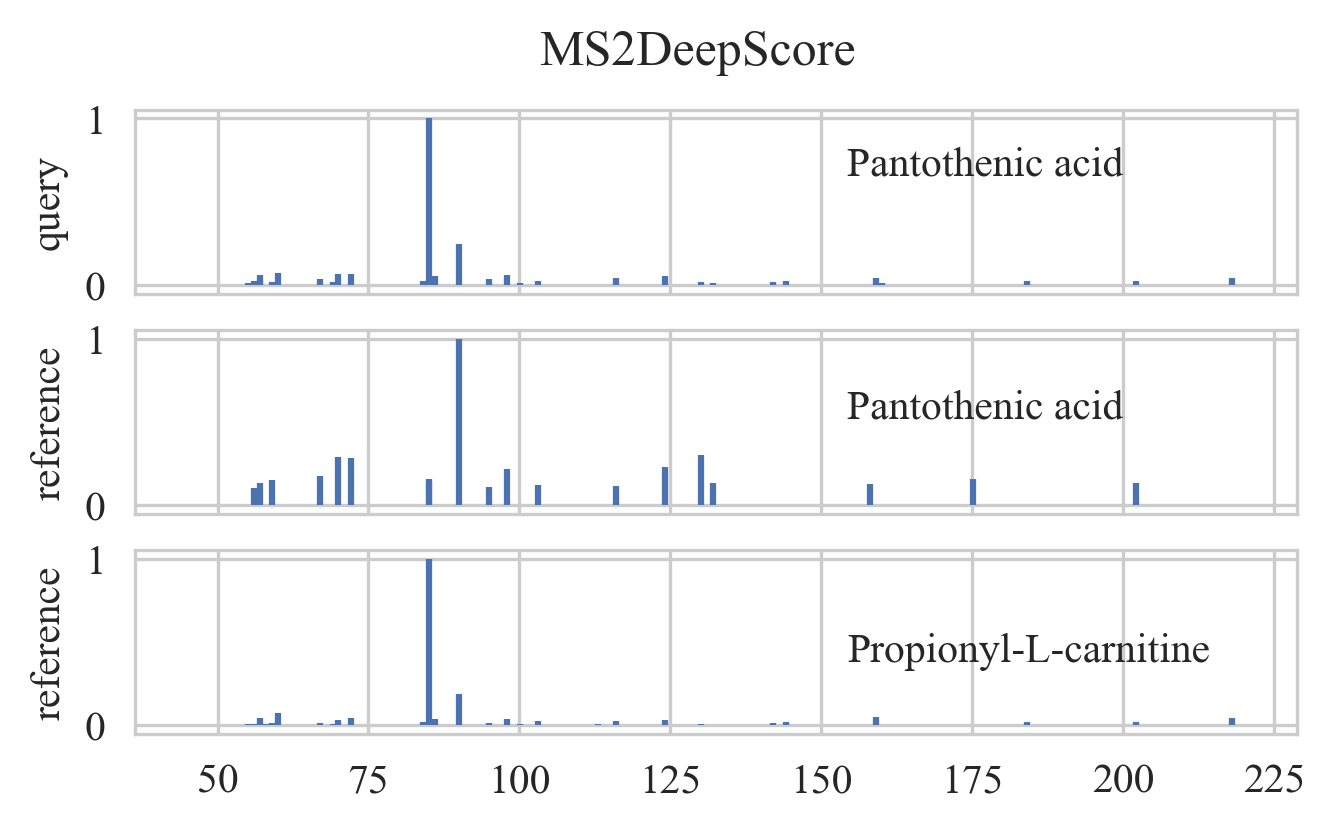

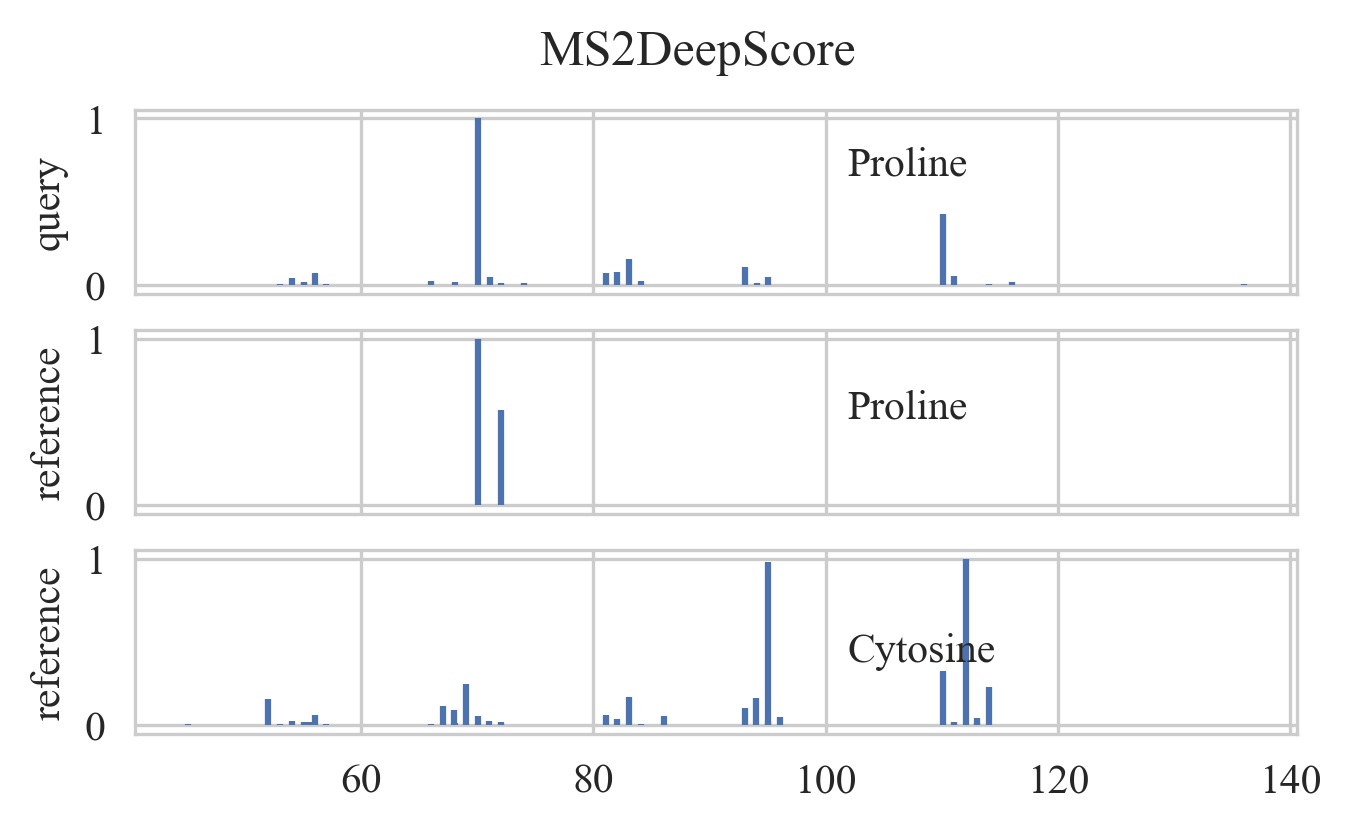

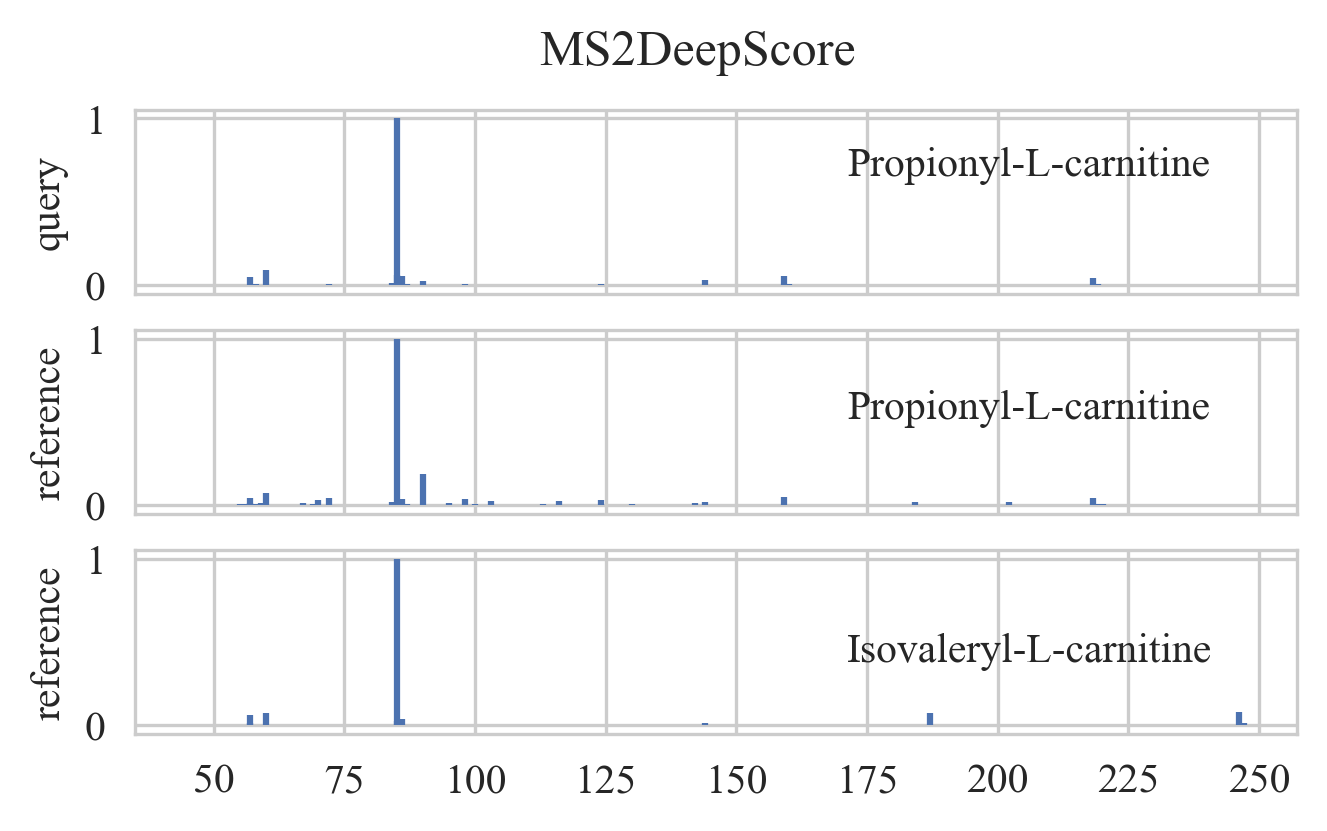

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.axes import Axes
from matplotlib.container import StemContainer
from matchms import Spectrum

def custom_stemcontainer(stem_container: StemContainer):
    stem_container.markerline.set_marker("")
    stem_container.baseline.set_color("none")
    stem_container.baseline.set_alpha(0.5)

query_spectra: list[Spectrum] = np.load("/data1/xp/data/MSBert/MTBLS1572/query.npy", allow_pickle=True)
ref_spectra: list[Spectrum]  = np.load("/data1/xp/data/MSBert/MTBLS1572/ref.npy", allow_pickle=True)

sns.set_style('whitegrid')
sns.set_palette('deep')
fm.fontManager.addfont('/usr/share/fonts/truetype/msttcorefonts/times.ttf')
plt.rcParams['font.family'] = 'Times New Roman'

for i, (rows, cols) in enumerate(zip(hit_miss_indices, output_indices)):
    if len(rows) == 0:
        continue

    for row, col in zip(rows, cols):
        figure, axs = plt.subplots(3, 1, figsize=(5, 2.7), dpi=300, sharex=True)
        s_row = query_spectra[row]
        s_row_ref = ref_spectra[row]
        s_col = ref_spectra[col]
        row_peaks = s_row.peaks.to_numpy
        row_ref_peaks = s_row_ref.peaks.to_numpy
        col_peaks = s_col.peaks.to_numpy
        axs: list[Axes]
        container = axs[0].stem(row_peaks[:, 0], row_peaks[:, 1])
        axs[0].set_ylabel("query")
        figure.text(x=0.6, y=0.8, s=s_row.get("compound_name"))
        custom_stemcontainer(container)
        container = axs[1].stem(row_ref_peaks[:, 0], row_ref_peaks[:, 1])
        axs[1].set_ylabel("reference")
        figure.text(x=0.6, y=0.5, s=s_row_ref.get("compound_name"))
        custom_stemcontainer(container)
        container = axs[2].stem(col_peaks[:, 0], col_peaks[:, 1])
        figure.text(x=0.6, y=0.2, s=s_col.get("compound_name"))
        axs[2].set_ylabel("reference")
        custom_stemcontainer(container)
        figure.suptitle(f"{methods[i]}")
        figure.savefig(SAVE_DIR / f"{methods[i]}_{row}.pdf", transparent=True, bbox_inches="tight")
        figure.savefig(SAVE_DIR / f"{methods[i]}_{row}.png", transparent=True, bbox_inches="tight")
        figure.savefig(SAVE_DIR / f"{methods[i]}_{row}.svg", transparent=True, bbox_inches="tight")

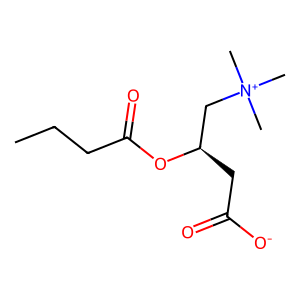

In [28]:
from pathlib import Path

SAVE_DIR = Path("./mol")

from rdkit import Chem
from rdkit.Chem import Draw

smiles = query_spectra[4].get("smiles")
mol = Chem.MolFromSmiles(smiles)
Draw.MolToFile(mol, SAVE_DIR / "query.svg")
Draw.MolToImage(mol)

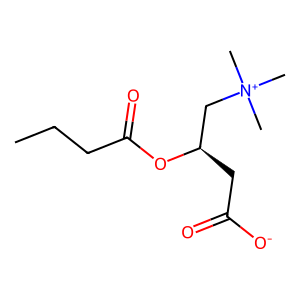

In [29]:
smiles = ref_spectra[4].get("smiles")
mol = Chem.MolFromSmiles(smiles)
Draw.MolToFile(mol, SAVE_DIR / "SpecEmbedding.svg")
Draw.MolToImage(mol)

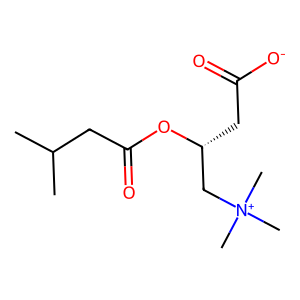

In [30]:
smiles = ref_spectra[11].get("smiles")
mol = Chem.MolFromSmiles(smiles)
Draw.MolToFile(mol, SAVE_DIR / "MSBERT.svg")
Draw.MolToImage(mol)

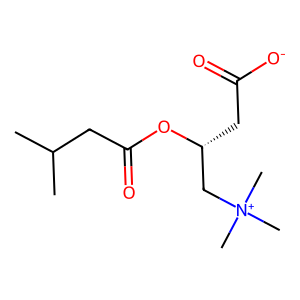

In [31]:
smiles = ref_spectra[11].get("smiles")
mol = Chem.MolFromSmiles(smiles)
Draw.MolToFile(mol, SAVE_DIR / "DreaMS.svg")
Draw.MolToImage(mol)

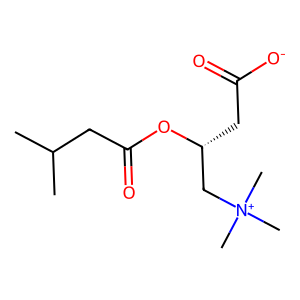

In [32]:
smiles = ref_spectra[11].get("smiles")
mol = Chem.MolFromSmiles(smiles)
Draw.MolToFile(mol, SAVE_DIR / "Spec2Vec.svg")
Draw.MolToImage(mol)

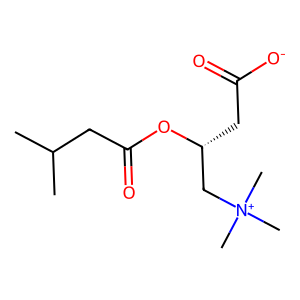

In [33]:
smiles = ref_spectra[11].get("smiles")
mol = Chem.MolFromSmiles(smiles)
Draw.MolToFile(mol, SAVE_DIR / "MS2DeepScore.svg")
Draw.MolToImage(mol)